In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor/brain_tumor/Training',target_size = (64, 64),batch_size = 40,class_mode = 'sparse')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor/brain_tumor/Testing',target_size = (64, 64),batch_size = 8,class_mode = 'sparse')

Found 5712 images belonging to 4 classes.
Found 3214 images belonging to 4 classes.


In [ ]:
model_transfer = Sequential()
pre_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(64, 64, 3),
    pooling='avg',  # Change to 'avg'
    classes=4,  # Change for multiclass classification
)

for layer in pre_model.layers:
    layer.trainable = False

model_transfer.add(pre_model)
model_transfer.add(Flatten())
model_transfer.add(Dense(units=128, activation='relu'))
model_transfer.add(Dense(units=4, activation='softmax'))  # Change to softmax for multiclass classification
model_transfer.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 23850500 (90.98 MB)
Trainable params: 262788 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model_transfer.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model_transfer.fit(training_set ,steps_per_epoch=10 ,epochs = 30)

Epoch 1/30
10/10 [==============================] - 101s 8s/step - loss: 1.4403 - accuracy: 0.2650
Epoch 2/30
10/10 [==============================] - 73s 7s/step - loss: 1.3923 - accuracy: 0.3250
Epoch 3/30
10/10 [==============================] - 67s 7s/step - loss: 1.3526 - accuracy: 0.3175
Epoch 4/30
10/10 [==============================] - 63s 6s/step - loss: 1.3286 - accuracy: 0.3350
Epoch 5/30
10/10 [==============================] - 62s 6s/step - loss: 1.2860 - accuracy: 0.4200
Epoch 6/30
10/10 [==============================] - 47s 4s/step - loss: 1.3538 - accuracy: 0.2900
Epoch 7/30
10/10 [==============================] - 52s 5s/step - loss: 1.3028 - accuracy: 0.3925
Epoch 8/30
10/10 [==============================] - 44s 4s/step - loss: 1.2792 - accuracy: 0.4300
Epoch 9/30
10/10 [==============================] - 42s 4s/step - loss: 1.3026 - accuracy: 0.3825
Epoch 10/30
10/10 [==============================] - 37s 4s/step - loss: 1.2743 - accuracy: 0.4350
Epoch 11/30
10/10 

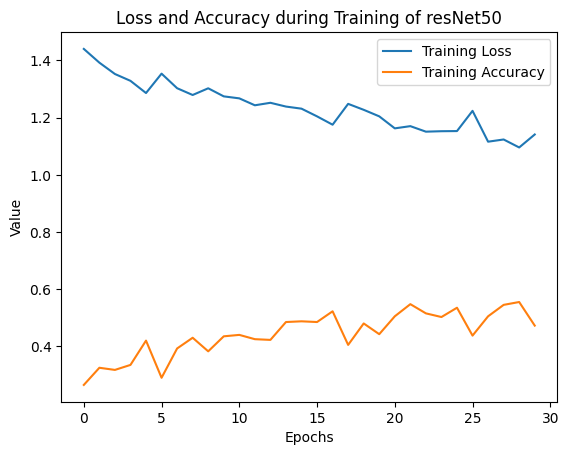

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']



# Plot loss and accuracy on the same graph

plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss and Accuracy during Training of resNet50')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_transfer.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

402/402 [==============================] - 808s 2s/step - loss: 1.1073 - accuracy: 0.5215
Test Loss: 1.1073157787322998
Test Accuracy: 0.5214685797691345


In [ ]:
#####################################################################################
##############   NORMAL CNN ##########################################################

In [ ]:
model=Sequential()
conv1=model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
conv2=model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
conv3=model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
conv4=model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
conv5=model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit(training_set,steps_per_epoch = 20,epochs = 60)

Epoch 1/60
20/20 [==============================] - 5s 246ms/step - loss: 0.3002 - accuracy: 0.8950
Epoch 2/60
20/20 [==============================] - 4s 202ms/step - loss: 0.3066 - accuracy: 0.9025
Epoch 3/60
20/20 [==============================] - 4s 210ms/step - loss: 0.3813 - accuracy: 0.8562
Epoch 4/60
20/20 [==============================] - 5s 223ms/step - loss: 0.2544 - accuracy: 0.9025
Epoch 5/60
20/20 [==============================] - 4s 199ms/step - loss: 0.3042 - accuracy: 0.8850
Epoch 6/60
20/20 [==============================] - 5s 228ms/step - loss: 0.2601 - accuracy: 0.9100
Epoch 7/60
20/20 [==============================] - 4s 201ms/step - loss: 0.2377 - accuracy: 0.9062
Epoch 8/60
20/20 [==============================] - 4s 203ms/step - loss: 0.2734 - accuracy: 0.9187
Epoch 9/60
20/20 [==============================] - 5s 242ms/step - loss: 0.2793 - accuracy: 0.8963
Epoch 10/60
20/20 [==============================] - 5s 244ms/step - loss: 0.2946 - accuracy: 0.9028

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

402/402 [==============================] - 19s 46ms/step - loss: 0.3337 - accuracy: 0.8880
Test Loss: 0.33374303579330444
Test Accuracy: 0.8879900574684143


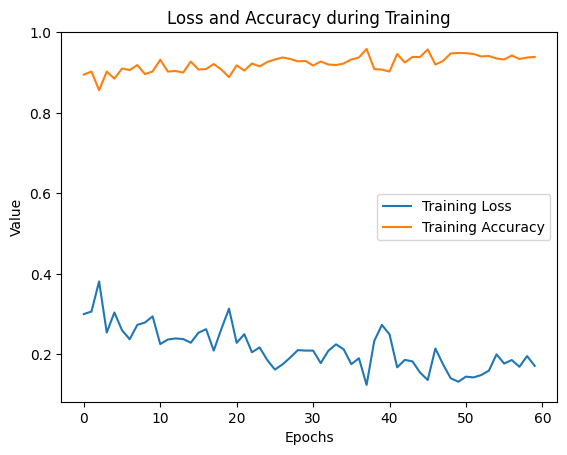

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history1.history['loss']
train_accuracy = history1.history['accuracy']



# Plot loss and accuracy on the same graph

plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss and Accuracy during Training')
plt.legend()
plt.show()

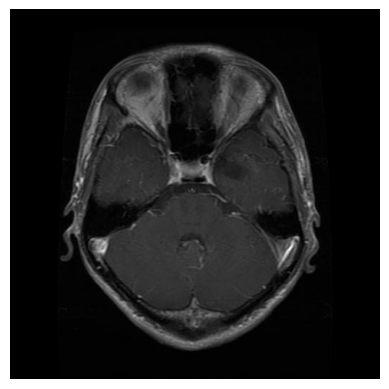

1/1 [==============================] - 0s 18ms/step
[[9.9895906e-01 5.4202911e-07 1.0403134e-03 1.0283882e-14]]
Gliomas


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image_utils
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/brain_tumor/brain_tumor/Testing/glioma/Te-glTr_0001.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))
image_data = plt.imread(image_path)

# Display the image
plt.imshow(image_data)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)
print(result)

res = result[0]
val = max(res)
ind = np.where(res == val)[0][0]  # Convert to scalar using [0][0]
class_names = ['Gliomas', 'Meninglioma', 'NoTumor', 'Pituitary']  # Replace with your class names
predicted_class_name = class_names[ind]
print(predicted_class_name)

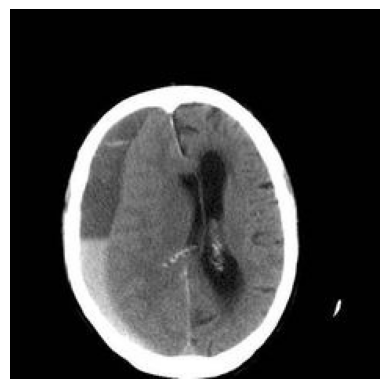

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0.]]
NoTumor


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image_utils
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/brain_tumor/brain_tumor/Testing/notumor/Te-noTr_0000.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))
image_data = plt.imread(image_path)

# Display the image
plt.imshow(image_data)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)
print(result)

ind = np.argmax(result)  # Find index of maximum value directly
class_names = ['Gliomas', 'Meninglioma', 'NoTumor', 'Pituitary']  # Replace with your class names
predicted_class_name = class_names[ind]
print(predicted_class_name)


1/1 [==============================] - 0s 63ms/step


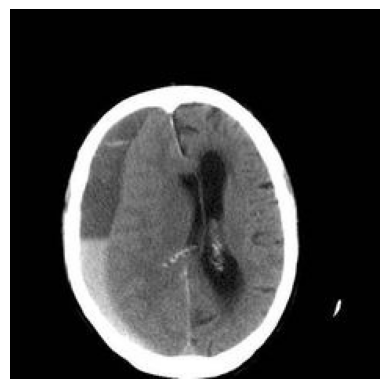

Meningioma


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load and preprocess data
# Define your model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Make predictions
image_path = '/content/drive/MyDrive/brain_tumor/brain_tumor/Testing/meningioma/Te-meTr_0000.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

plt.imshow(image_data)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

ind = np.argmax(result)
class_names = ['Gliomas', 'Meningioma', 'No Tumor', 'Pituitary']
predicted_class_name = class_names[ind]
print(predicted_class_name)


1/1 [==============================] - 0s 88ms/step


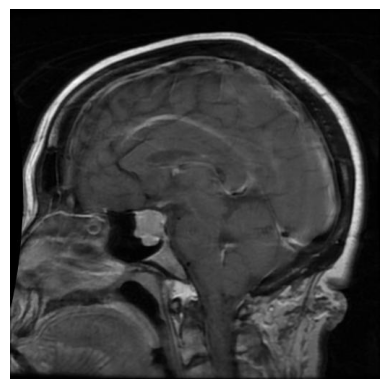

Pituitary


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load and preprocess data
# Define your model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Make predictions
image_path = '/content/drive/MyDrive/brain_tumor/brain_tumor/Testing/pituitary/Te-piTr_0001.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

plt.imshow(image_data)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

ind = np.argmax(result)
class_names = ['Gliomas', 'Meningioma', 'No Tumor', 'Pituitary']
predicted_class_name = class_names[ind]
print(predicted_class_name)


1/1 [==============================] - 0s 25ms/step


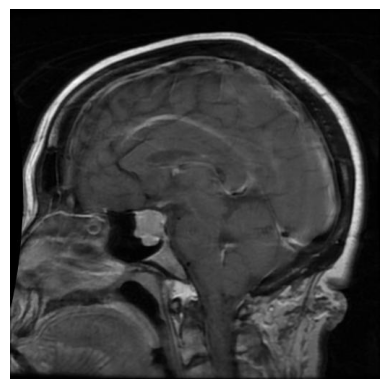

Gliomas


In [ ]:
# Make predictions
image_path = '/content/drive/MyDrive/brain_tumor/brain_tumor/Testing/glioma/Te-glTr_0000.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

plt.imshow(image_data)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

ind = np.argmax(result)
class_names = ['Meningioma','Gliomas', 'No Tumor', 'Pituitary']
predicted_class_name = class_names[ind]
print(predicted_class_name)